In [11]:
import pandas as pd
from pyod.models.iforest import IForest # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score


In [4]:

data = pd.read_csv('/Users/saikarthik/Desktop/Nexus-S1 Deakin /cleaned.csv')

values = data['value'].values.reshape(-1, 1)

In [5]:
model = IForest()

model.fit(values)


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [6]:
anomalies = model.predict(values)

In [7]:
data['anomaly'] = anomalies

In [8]:
print(data)


       Unnamed: 0            timestamp      value  anomaly
0               0  2013-12-02 21:15:00  73.967320        0
1               1  2013-12-02 21:20:00  74.935880        0
2               2  2013-12-02 21:25:00  76.124160        0
3               3  2013-12-02 21:30:00  78.140710        0
4               4  2013-12-02 21:35:00  79.329834        0
...           ...                  ...        ...      ...
22690       22690  2014-02-19 15:05:00  98.185420        0
22691       22691  2014-02-19 15:10:00  97.804170        0
22692       22692  2014-02-19 15:15:00  97.135470        0
22693       22693  2014-02-19 15:20:00  98.056854        0
22694       22694  2014-02-19 15:25:00  96.903860        0

[22695 rows x 4 columns]


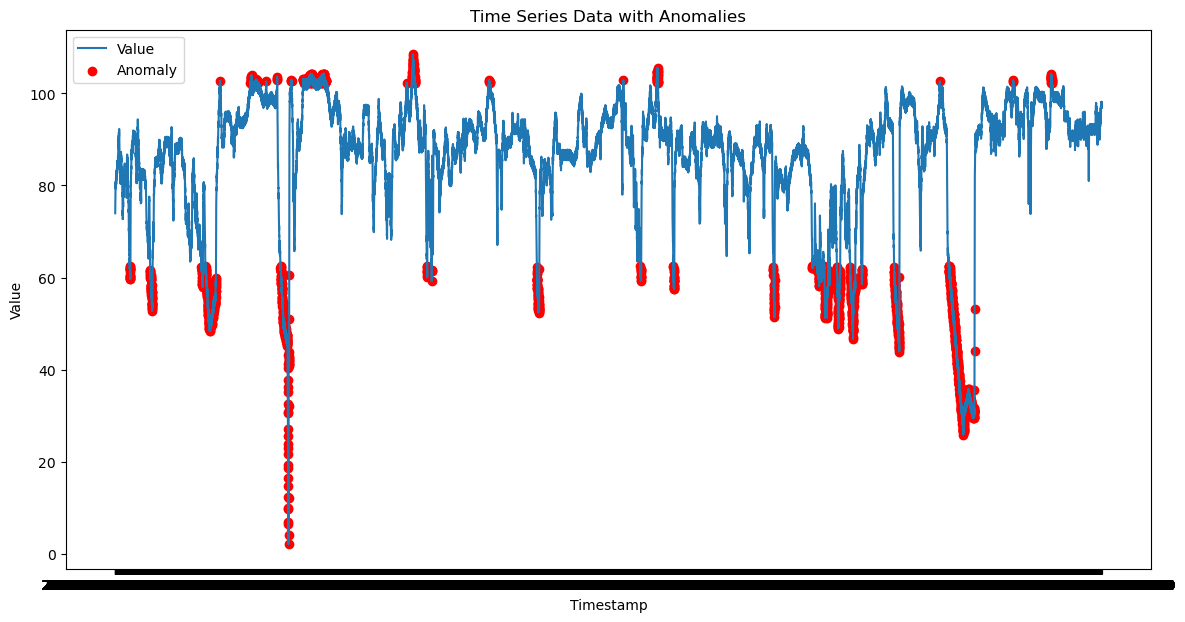

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data['timestamp'], data['value'], label='Value')

# Highlight anomalies
anomalous_data = data[data['anomaly'] == 1]
plt.scatter(anomalous_data['timestamp'], anomalous_data['value'], color='red', label='Anomaly')

# Add labels and legend
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series Data with Anomalies')
plt.legend()
plt.show()

In [14]:
data["anomaly"].value_counts()

anomaly
0    20436
1     2259
Name: count, dtype: int64

In [15]:
threshold = anomalies.mean() + 3 * anomalies.std()

anomalies = anomalies > threshold


pseudo_ground_truth = (anomalies > threshold).astype(int)  


In [ ]:

precision = precision_score(pseudo_ground_truth, anomalies)
recall = recall_score(pseudo_ground_truth, anomalies)
f1 = f1_score(pseudo_ground_truth, anomalies)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")